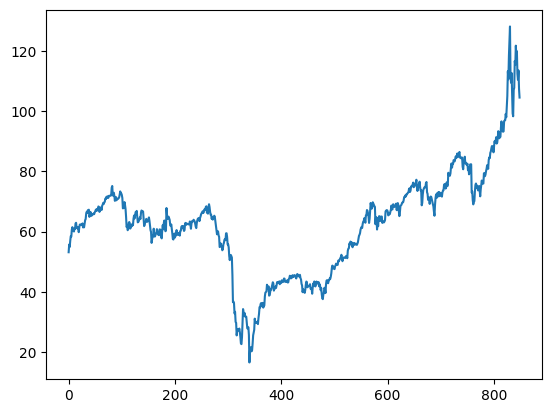

In [7]:
import pandas as pd
import numpy as np
import httpx
import pyarrow as pa
import matplotlib.pyplot as plt

api_url = "https://api.variantperception.com"
api_key = "YOUR_KEY_HERE"

df = pd.read_csv('data/BrentOil.csv')
plt.plot(df.Close)
plt.show()

In [5]:

df['dt'] = pd.to_datetime(df.Dates).dt.strftime('%Y-%m-%d %H:%M:%S')
df['price'] = df.Close

requestsHeaders = {
    "Authorization": f"Bearer {api_key}",
    "Content-Type": "application/json",
}
with httpx.Client(http2=True) as client:
    body = {
        "index": df.dt.to_list(),
        "price": df.price.to_list()
        #"format": "csv",
    }

    res = client.post(
        api_url + "/api/v1/model/lppl",
        json=body,
        headers=requestsHeaders,
        timeout=600,
    )
    print(res)
    #print(df_res.text)

    with pa.ipc.open_file(res.content) as reader:
        output = reader.read_pandas()
    
output


<Response [200 OK]>


,price,bubble_found,crash_found,bubble_end_p,crash_end_p
2019-01-01,53.13,NaN,NaN,NaN,NaN
2019-01-02,55.69,NaN,NaN,NaN,NaN
2019-01-03,54.88,NaN,NaN,NaN,NaN
2019-01-04,56.91,NaN,NaN,NaN,NaN
2019-01-07,58.49,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2022-05-18,NaN,0.0,0.0,0.0,0.0
2022-05-19,NaN,0.0,0.0,0.0,0.0
2022-05-20,NaN,0.0,0.0,0.0,0.0
2022-05-23,NaN,0.0,0.0,0.0,0.0


In [8]:
df = output

bubble_found = df[df.bubble_found > 0].index
crash_found = df[df.crash_found > 0].index

if len(bubble_found) > 0:
    print(f"LPPL Bubbles were found on: {bubble_found.to_list()}")
    print(f"Best Bubble End Date estimate: {df.index[np.argmax(df.bubble_end_p)]}")
else:
    print("Did not find any Bubbles")

if len(crash_found) > 0:
    print(f"LPPL Crashes were found on: {crash_found.to_list()}")
    print(f"Best Crash End Date estimate: {df.index[np.argmax(df.crash_end_p)]}")
else:
    print("Did not find any Crashes")



LPPL Bubbles were found on: [Timestamp('2022-03-02 00:00:00'), Timestamp('2022-03-03 00:00:00'), Timestamp('2022-03-04 00:00:00'), Timestamp('2022-03-18 00:00:00'), Timestamp('2022-03-22 00:00:00'), Timestamp('2022-03-30 00:00:00'), Timestamp('2022-03-31 00:00:00'), Timestamp('2022-04-06 00:00:00'), Timestamp('2022-04-08 00:00:00'), Timestamp('2022-04-11 00:00:00')]
Best Bubble End Date estimate: 2022-03-03 00:00:00
Did not find any Crashes


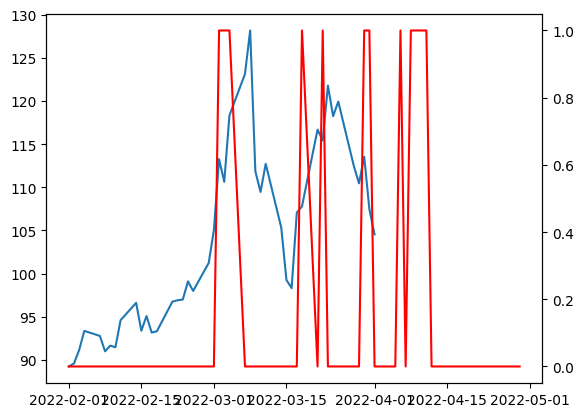

In [16]:
df = df.loc['2022-02-01':'2022-05-01']
plt.plot(df.price)
plt.twinx().plot(df.bubble_found, color="red")
plt.show()

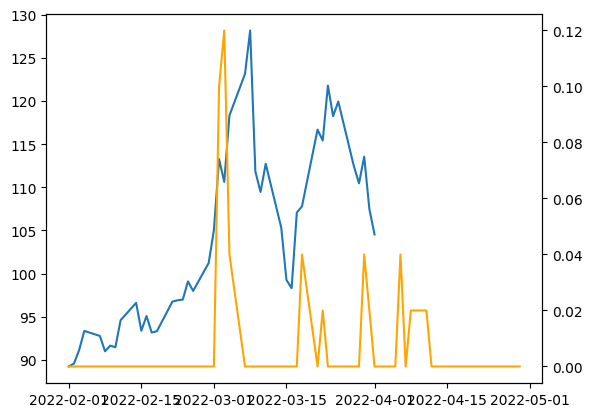

In [17]:
df = df.loc['2022-02-01':'2022-05-01']
plt.plot(df.price)
plt.twinx().plot(df.bubble_end_p, color="orange")
plt.show()